In [97]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mat
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [98]:
df=pd.read_csv("Bank_Personal_Loan_Modelling-1.csv")

In [99]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [100]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

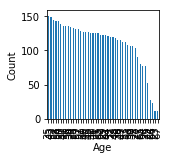

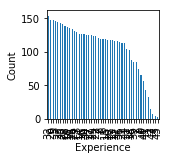

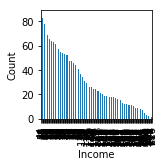

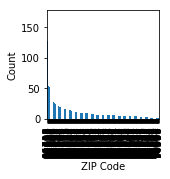

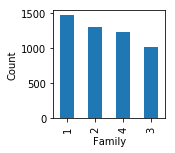

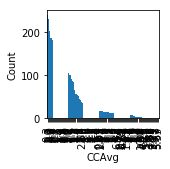

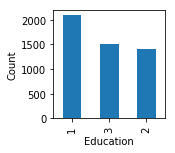

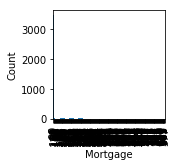

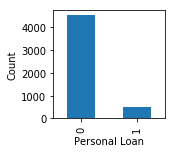

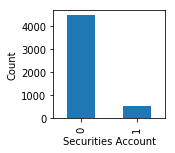

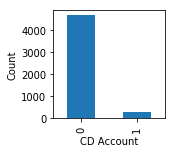

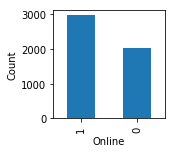

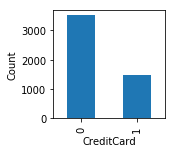

In [101]:
for col in df.columns:
    if col=="ID":
        continue
    else:
        plt.figure(figsize=(2,2))
        plt.xlabel(col)
        plt.ylabel("Count")
        df[col].value_counts().plot(kind="bar")

###### From above count plot, we can see the class imbalance for following columns:
    Personal Loan (There is high class imbalance in Target Column)
    Securities Account
    CD Account
    Credit Card

    Will deal with class imbalance using SMOTE

In [102]:
X=df.drop(["Personal Loan"],axis=1)
y=df["Personal Loan"]

In [125]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.30, random_state=27)

#Handling Class imbalance

sm=SMOTE()

X_train, y_train = sm.fit_sample(X_train, y_train)


###### Fitting KNN Model

In [126]:
scaler=StandardScaler()

In [127]:
X_train_standardize=scaler.fit_transform(X_train)

In [128]:
KNN=KNeighborsClassifier(n_neighbors=2)

In [129]:
KNN_model=KNN.fit(X_train_standardize,y_train)

In [130]:
knn_y_predict = KNN_model.predict(X_test)
knn_accuracy_score=metrics.accuracy_score(y_test, knn_y_predict)
print("Accuracy Score by KNN is:",knn_accuracy_score)

Accuracy Score by KNN is: 0.9033333333333333


In [131]:
KNN_confusion_matrix=confusion_matrix(y_test,knn_y_predict)
print("KNN Confusion Matrix is:\n\n",KNN_confusion_matrix)

KNN Confusion Matrix is:

 [[1355    0]
 [ 145    0]]


###### Fitting Logisitic Regression

In [132]:
logisticRegression=LogisticRegression()

In [133]:
logistic_model=logisticRegression.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [134]:
logistic_y_predict=logistic_model.predict(X_test)

In [135]:
logistic_accuracy_score=metrics.accuracy_score(logistic_y_predict,y_test)
print("Logistic Accuracy Score:",logistic_accuracy_score)

Logistic Accuracy Score: 0.9053333333333333


In [136]:
logistic_confusion_matrix=confusion_matrix(y_test,logistic_y_predict)
print("Logistic Confusion Matrix is:\n",logistic_confusion_matrix)

Logistic Confusion Matrix is:
 [[1230  125]
 [  17  128]]


###### Fitting Naive Bayes

In [137]:
gnb = GaussianNB()  

In [138]:
naive_model=gnb.fit(X_train, y_train) 

In [139]:
naive_y_predict = gnb.predict(X_test) 

In [140]:
naive_accuracy_score=metrics.accuracy_score(naive_y_predict,y_test)
print("Naive Bayes Accuracy Score is:",naive_accuracy_score)

Naive Bayes Accuracy Score is: 0.888


In [143]:
naive_confusion_matrix=confusion_matrix(naive_y_predict,y_test)
print("Naive Bayes Confusion Matrix is:\n",naive_confusion_matrix)

Naive Bayes Confusion Matrix is:
 [[1209   22]
 [ 146  123]]


###### Interpretation:

###### As we can see from the Confusion Matrix of KNN,Logistic and Naive Bayes 



###### Only Logisitic Confusion Matrix has minimum of False Negatives


###### Only few potential customers who were willing to purchase the loan were misclassified as being not interested in purchasing loan by Logisitic Regression 

###### But this misclassification was higher for KNN (145 misclassifications) 


###### Higher Misclassification for Naive Bayes as well ( 146 misclassifications)